In [1]:
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [3]:
df.shape

(545, 13)

In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
num = df.select_dtypes(include = ['int64'])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

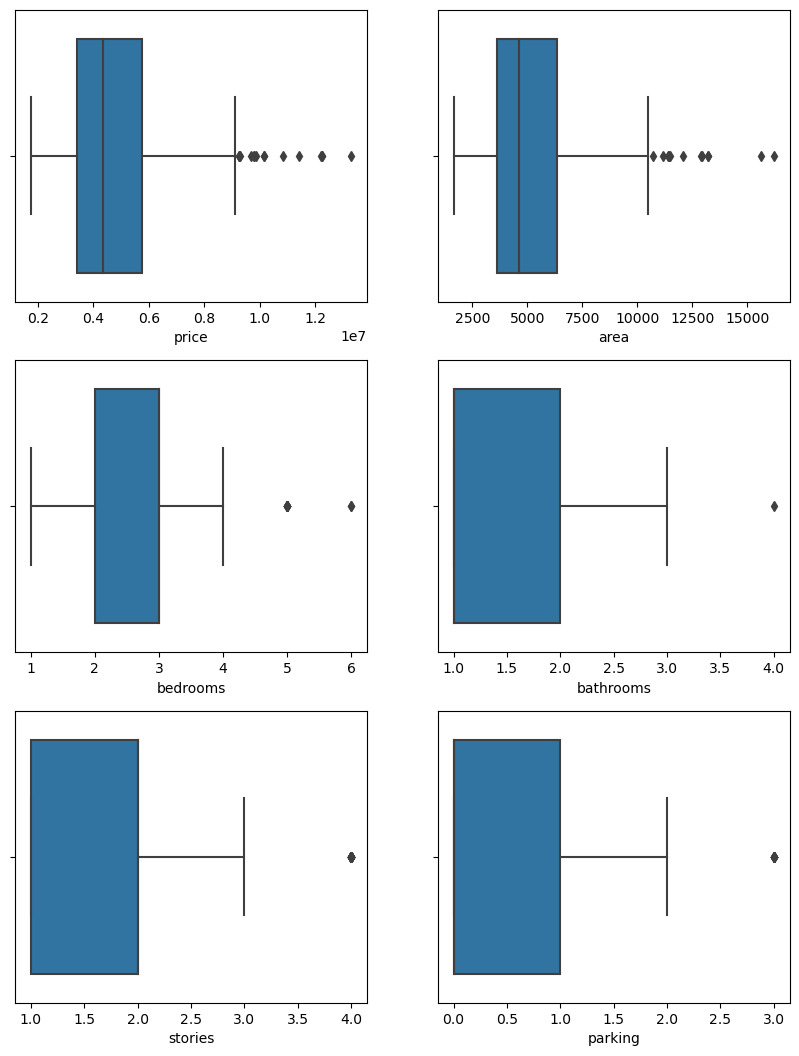

In [7]:
plt.figure(figsize = (10,22))
for i in range(len(num.columns)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x = num.columns[i],data = df)

In [8]:
num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

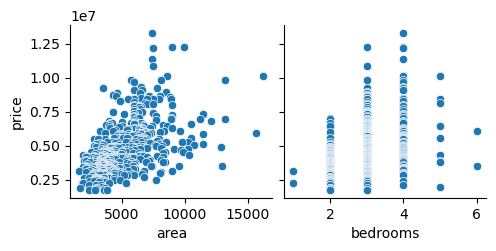

In [9]:
sns.pairplot(x_vars=['area','bedrooms'],y_vars='price',data=df)

In [10]:
cat = df.select_dtypes(include=['object'])
cat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [11]:
cat.nunique()

mainroad            2
guestroom           2
basement            2
hotwaterheating     2
airconditioning     2
prefarea            2
furnishingstatus    3
dtype: int64

## Dummy Variables

In [12]:
cat = df.select_dtypes(include=['object'])
cat.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [13]:
cat_dummy = pd.get_dummies(cat, drop_first = True)

In [14]:
cat_dummy

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,0,1
541,0,0,0,0,0,0,1,0
542,1,0,0,0,0,0,0,1
543,0,0,0,0,0,0,0,0


In [15]:
df.drop(columns = list(cat.columns), inplace = True)

In [16]:
df = pd.concat([df, cat_dummy], axis = 1)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


## Split Data into Train - Test

In [18]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size = 0.7, random_state = 100)

In [19]:
df_train.shape

(381, 14)

In [20]:
df_test.shape

(164, 14)

## Scale Numerical Data (Scaling)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
df_train[num.columns] = scaler.fit_transform(df_train[num.columns])

In [23]:
df_test[num.columns] = scaler.transform(df_test[num.columns])

In [24]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
359,-0.575831,-0.736734,0.092755,-0.575844,-0.911674,0.318635,1,0,0,0,0,0,0,1
19,2.254239,0.632894,0.092755,1.533738,0.219752,0.318635,1,0,0,0,1,1,1,0
159,0.386778,-0.955291,0.092755,1.533738,-0.911674,-0.848672,1,1,1,0,1,0,0,0
35,1.828458,0.914591,0.092755,1.533738,2.482604,1.485941,1,0,0,0,1,0,0,0
28,2.003961,1.375990,2.811204,1.533738,0.219752,1.485941,1,0,1,1,0,0,0,1


## X and Y(train-test)

In [25]:
X_train = df_train.drop(columns = ['price'])
y_train = df_train['price']

In [26]:
X_test = df_test.drop(columns = ['price'])
y_test = df_test['price']

## Modelling

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_test = lr.predict(X_test)

In [29]:
y_pred_train = lr.predict(X_train)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.6729582743459919

In [31]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.6814893088451202

In [32]:
X_train.shape

(381, 13)

In [33]:
X_test.shape

(164, 13)

In [34]:
y_train.shape

(381,)

In [35]:
y_test.shape

(164,)

## RFE

In [36]:
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 15)

rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [37]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [38]:
X_train.columns[rfe.support_]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [39]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [40]:
X_train_rfe.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_rfe, y_train)

LinearRegression()

In [42]:
X_test_rfe = X_test[X_train.columns[rfe.support_]]

In [43]:
y_pred_test = lr.predict(X_test_rfe)

In [44]:
y_pred_train = lr.predict(X_train_rfe)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.6729582743459919

In [46]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.6814893088451202

## Manual selection

### OLS = Ordinary Least Square Method

In [48]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

ms1 = sm.OLS(y_train,X_train_rfe).fit()
print(ms1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           8.83e-83
Time:                        07:44:44   Log-Likelihood:                -322.66
No. Observations:                 381   AIC:                             673.3
Df Residuals:                     367   BIC:                             728.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     